# Example 1: 2D-3D+3x3x3 network

Download the LCIMB platelet segmentation dataset and trained 2D-3D+3x3x3 models. Try them out on the platelet segmentation task. See (Guay et al., 2019) for more details.

---

## Setup

In [1]:
import logging
import os

import matplotlib.pyplot as plt
import tensorflow as tf

# Utilities for this example, abstracting away a messy in-lab codebase
from src.demos import demo_data, demo_segmentation
from src.download import download_data_if_missing, download_model
from src.segment import segment

tf.logging.set_verbosity(tf.logging.ERROR)
logger_level = logging.ERROR

---

## Data download

#### Data download and example output directories


In [2]:
# Set location for the folder where data is downloaded
data_download_dir = os.path.expanduser('~/examples/data')

# Set location for the folder where segmentations are saved.
# If None, segmentations are displayed but not saved
output_dir = None

# Set location for the folder where trained models are downloaded
model_base_dir = os.path.expanduser('~/examples/models')


#### Download data

If the data already exists in the download folder, the download will be skipped.

In [3]:
download_data_if_missing(data_download_dir)

# Dir containing train/eval/test images
data_dir = os.path.join(data_download_dir, 'platelet_data')

0it [00:00, ?it/s]

100%|█████████▉| 188530688/188671885 [00:14<00:00, 15303371.00it/s]

#### Data demo

Images of the training and eval volumes and their ground-truth manual labels, plus a visualization of the training error weights used in summing up per-voxel cross entropy losses during training.

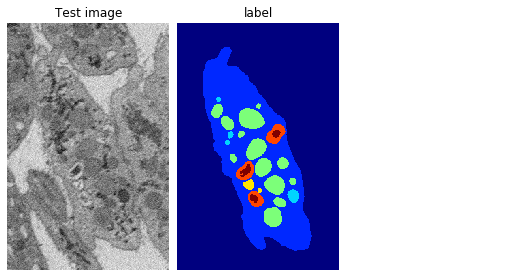

In [4]:
demo_data(data_dir)

---

## Model download

Download one or more trained 2D-3D+3x3x3 models, use them to segment the test image volume.

#### Download models

In [5]:
# Number of models to download, between 1 and 4. Each one is ~128 MB
n_models = 4

model_urls = [
    'https://www.dropbox.com/s/peroaqonnq1chtv/2d3d-3x3x3_0.zip?dl=1',
    'https://www.dropbox.com/s/seqjvr7ulx9j8cp/2d3d-3x3x3_1.zip?dl=1',
    'https://www.dropbox.com/s/p536tuy8hgz2gmb/2d3d-3x3x3_2.zip?dl=1',
    'https://www.dropbox.com/s/uwhfq3jsijlfv9j/2d3d-3x3x3_3.zip?dl=1']

model_dirs = [download_model(u, model_base_dir) for u in model_urls[:n_models]]

188678144it [00:30, 15303371.00it/s]                               

#### Segmentation demo 1: Test data

Segment the test data using the downloaded models. If `n_models > 1`, the output segmentation is an ensemble of the individual model segmentations

In [6]:
test_seg, test_probs = segment(
    net_sources=model_dirs,
    image_source=os.path.join(data_dir, 'test-images.tif'),
    label_source=os.path.join(data_dir, 'test-labels.tif'),
    output_dir=output_dir)

# Plot the segmentation

fig, ax = plt.subplots(1, 1, figsize=(400/110, 609/110))

ax.imshow(test_seg[75], cmap='jet', vmin=0, vmax=6)
ax.set_title('Test prediction')
h = ax.axis('off')

#### Segmentation demo 2

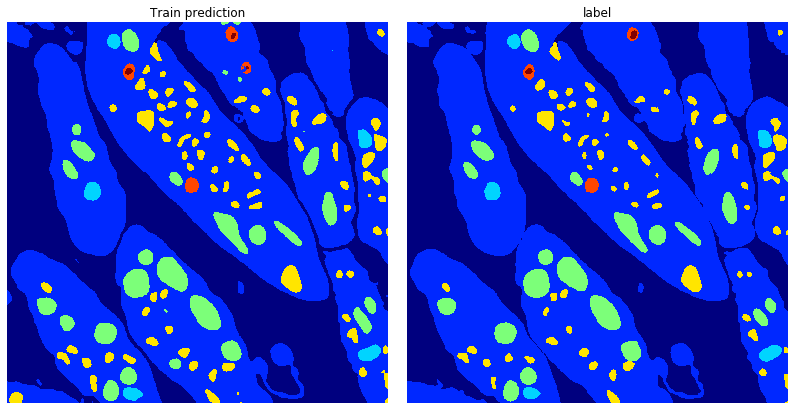

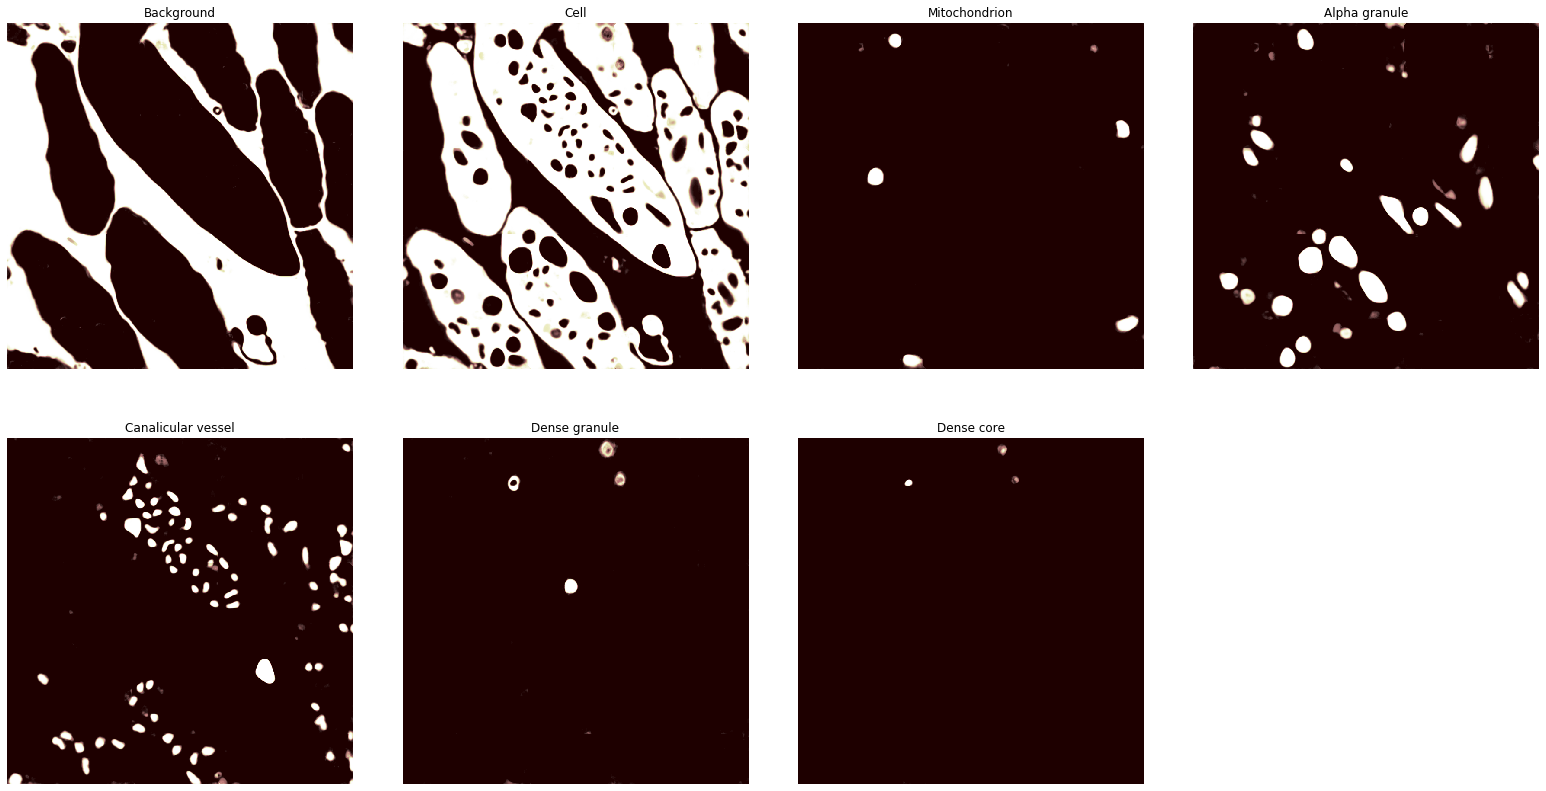

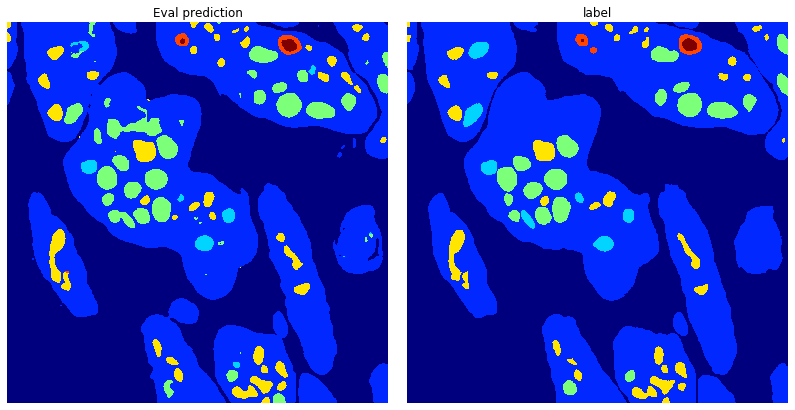

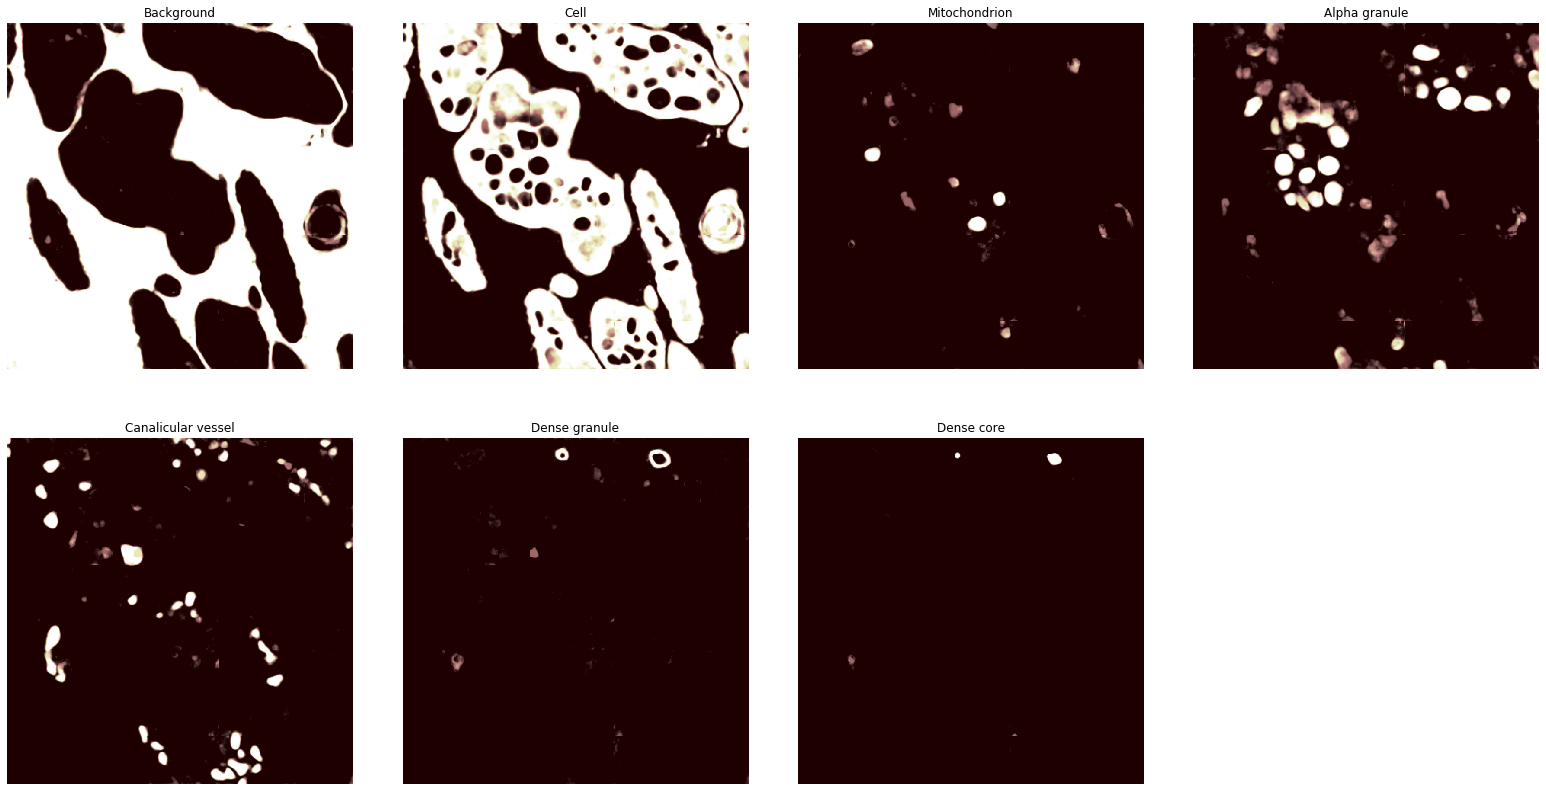

In [7]:
demo_segmentation(model_dirs, data_dir)